<a href="https://colab.research.google.com/github/YinhaoHe/Python-AI-teaching/blob/master/W_O_kmeans_Image_Classificaiton_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
#Download the dataset
fashion_mnist = keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


**Exploring the Data** <br>
What is the in the dataset? <br>
What do these values means?

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

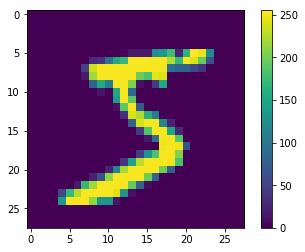

In [ ]:
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)


**Data Processing** <br>
Scale all of the values to be in the range 0 to 1

In [ ]:
x_train = x_train / 255.0

x_test = x_test / 255.0

**Build the Model**<br>
use input_shape=(28,28), instead of input_dim for the first hidden layer



In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation = "relu"),
    keras.layers.Dense(10, activation="softmax")
])

W0621 18:33:25.608303 140638842509184 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


**Compile the Model** <br>
optimizer= 'adam'<br>
loss='sparse_categorical_crossentropy'

In [ ]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**Train the Model**

In [ ]:
model.fit(x_train, y_train, epochs=5)


Epoch 1/5
60000/60000 [==============================] - 5s 78us/sample - loss: 0.2625 - acc: 0.9244
Epoch 2/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.1176 - acc: 0.9655
Epoch 3/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.0799 - acc: 0.9755
Epoch 4/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.0607 - acc: 0.9813
Epoch 5/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.0470 - acc: 0.9852


**Evaluating Accuracy** <br>
On the Test set

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)


10000/10000 [==============================] - 0s 37us/sample - loss: 0.0867 - acc: 0.9727
Test accuracy: 0.9727


**Making Predictions**

In [ ]:
def predict_img(images, labels,num):
  img = images[num]
  plt.imshow(img)
  
  img = (np.expand_dims(img,0))
  prediction = model.predict(img)
  
  pred_label = np.argmax(prediction)
  correct_label = labels[num]
  print("Prediction: " + str(pred_label))
  print("Correct label: " + str(correct_label))

Prediction: 4
Correct label: 4


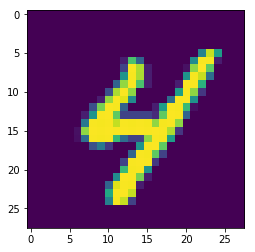

In [ ]:
predict_img(x_train,y_train,2341)